In [ ]:
# Data Processing and Analysis Script for Eye Tracking Data

import glob
import pandas as pd
import re
import os
import pingouin as pg
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [17]:
# Define AOIs
AOIs = [
    { 'id': 'bookshelf',  'x':  44, 'y':  36, 'w': 249, 'h': 526 },
    { 'id': 'sofa_web',   'x': 350, 'y': 309, 'w': 127, 'h': 124 },
    { 'id': 'sofa_game',  'x': 543, 'y': 301, 'w': 123, 'h': 124 },
    { 'id': 'phone',      'x': 704, 'y': 284, 'w': 131, 'h': 125 },
    { 'id': 'lamp',       'x': 812, 'y':  87, 'w': 107, 'h': 134 },
    { 'id': 'tv',         'x': 842, 'y': 275, 'w': 171, 'h': 198 },
    { 'id': 'files',      'x': 500, 'y': 465, 'w': 101, 'h':  89 }
]

In [ ]:
#Creating a combined structured dataset by fetching files named gaze_data.csv, gaze_data (1).csv, gaze_data_2.csv, etc.

files = sorted(glob.glob("gaze_data*.csv"))
if not files:
    raise FileNotFoundError("No files matching 'gaze_data*.csv' found.")

def user_id_from_name(name, fallback):
    m = re.search(r"\((\d+)\)", name)  # grabs the (3) in "gaze_data (3).csv"
    return int(m.group(1)) if m else fallback

frames = []
for i, path in enumerate(files, start=1):
    df = pd.read_csv(path)
    df["user"] = user_id_from_name(path, i)
    frames.append(df)

combined = pd.concat(frames, ignore_index=True, sort=False)
combined.to_csv("gaze_data_all_users_long.csv", index=False)
print(f"Combined {len(files)} files -> gaze_data_all_users_long.csv")


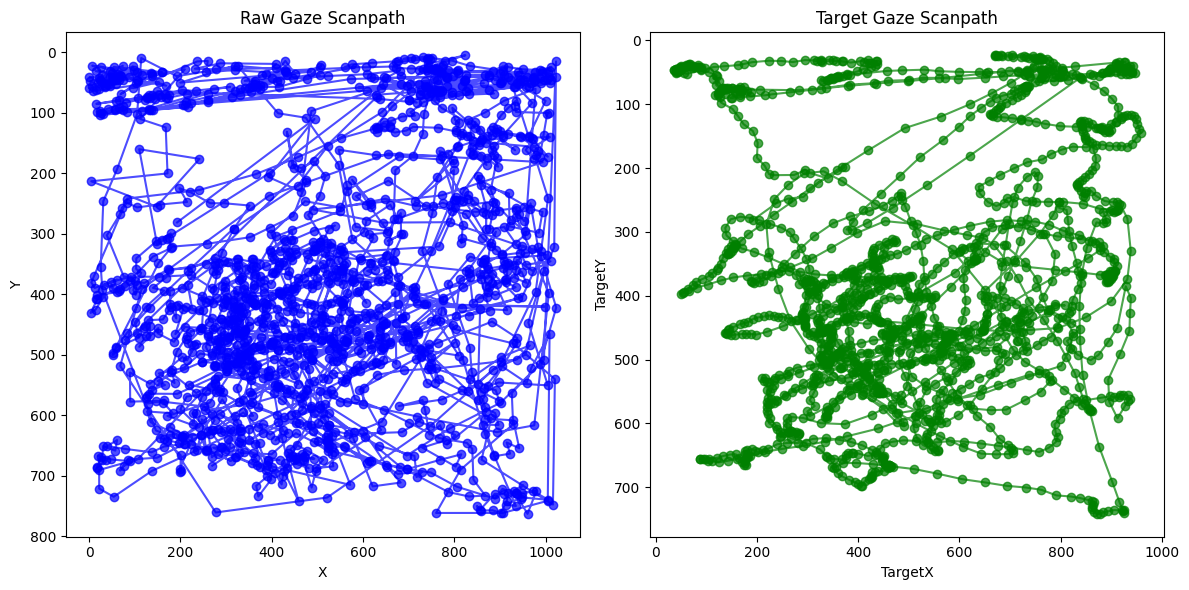

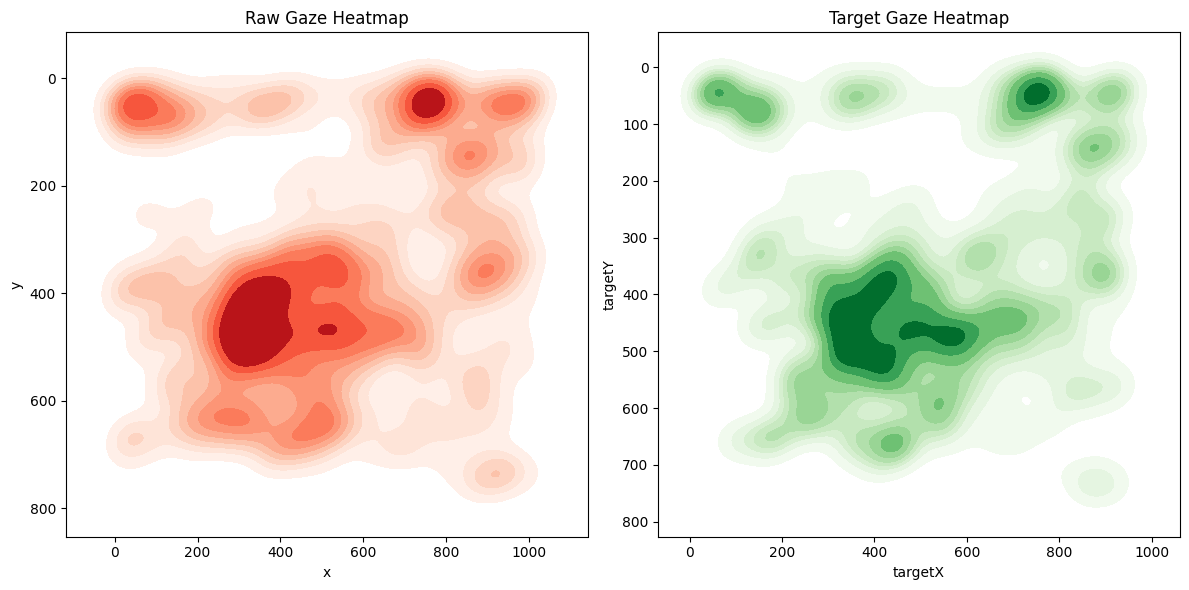

In [23]:
#EXPLORATORY VISUALIZATION


# Load dataset 
df = pd.read_csv(r'C:\Users\nisae\code\MPI\HCI\FINAL\gaze_data (4).csv')

#Sort by timestamp
df = df.sort_values(by='timestamp')

#Plot raw and target scanpaths
def plot_scanpath(df):
    plt.figure(figsize=(12, 6))

    # Raw gaze scanpath
    plt.subplot(1, 2, 1)
    plt.plot(df['x'], df['y'], marker='o', linestyle='-', color='blue', alpha=0.7)
    plt.title("Raw Gaze Scanpath")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.gca().invert_yaxis()  # Invert y-axis if data is screen-based

    # Target gaze scanpath
    plt.subplot(1, 2, 2)
    plt.plot(df['targetX'], df['targetY'], marker='o', linestyle='-', color='green', alpha=0.7)
    plt.title("Target Gaze Scanpath")
    plt.xlabel("TargetX")
    plt.ylabel("TargetY")
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

# Plot heatmaps of gaze points
def plot_heatmaps(df):
    plt.figure(figsize=(12, 6))

    # Raw gaze heatmap
    plt.subplot(1, 2, 1)
    sns.kdeplot(x=df['x'], y=df['y'], cmap='Reds', fill=True, bw_adjust=0.5)
    plt.title("Raw Gaze Heatmap")
    plt.gca().invert_yaxis()

    # Target gaze heatmap
    plt.subplot(1, 2, 2)
    sns.kdeplot(x=df['targetX'], y=df['targetY'], cmap='Greens', fill=True, bw_adjust=0.5)
    plt.title("Target Gaze Heatmap")
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

# Execute plotting functions
plot_scanpath(df)
plot_heatmaps(df)


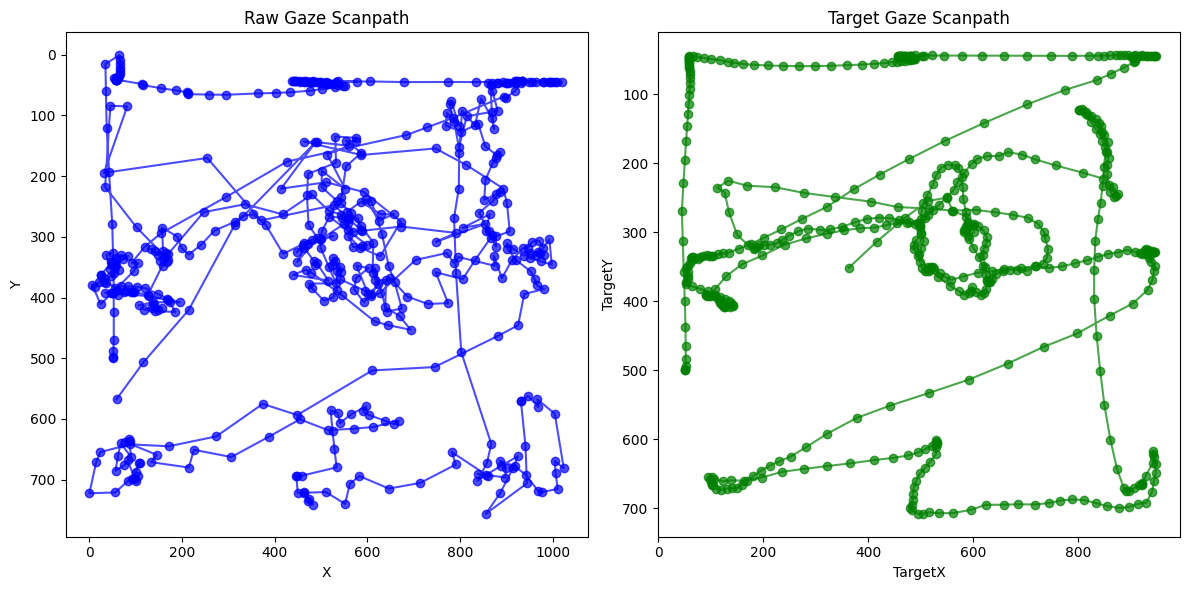

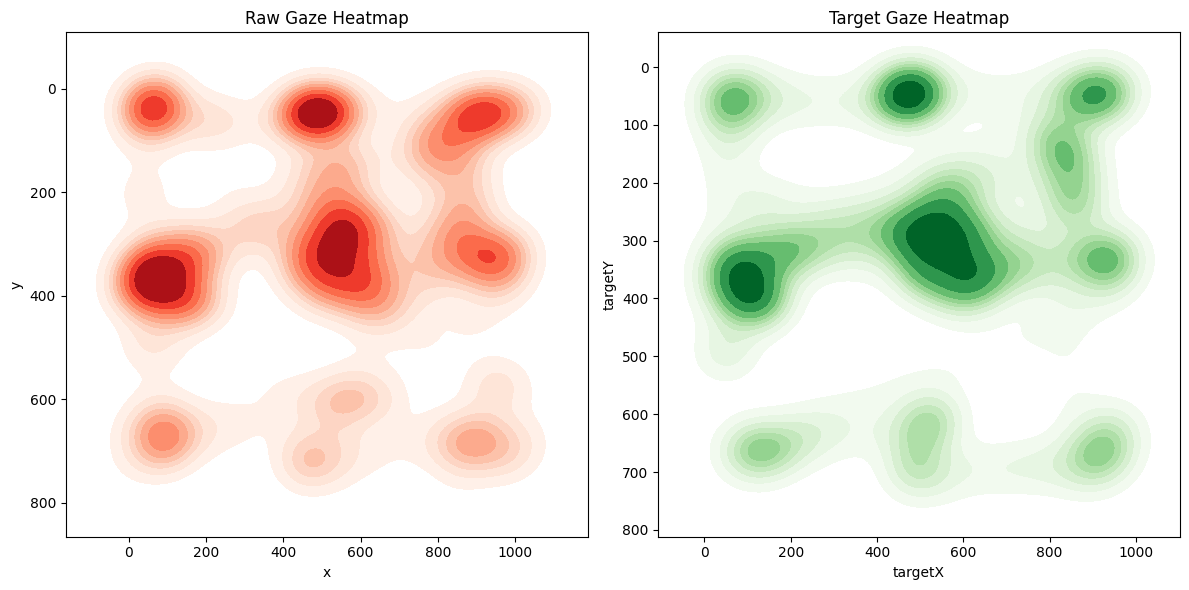

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (update the path to your actual CSV file)
df = pd.read_csv(r'C:\Users\nisae\code\MPI\HCI\FINAL\gaze_data (7).csv')

# Step 1: Sort by timestamp
df = df.sort_values(by='timestamp')

# Step 2: Plot raw and target scanpaths
def plot_scanpath(df):
    plt.figure(figsize=(12, 6))

    # Raw gaze scanpath
    plt.subplot(1, 2, 1)
    plt.plot(df['x'], df['y'], marker='o', linestyle='-', color='blue', alpha=0.7)
    plt.title("Raw Gaze Scanpath")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.gca().invert_yaxis()  # Invert y-axis if data is screen-based

    # Target gaze scanpath
    plt.subplot(1, 2, 2)
    plt.plot(df['targetX'], df['targetY'], marker='o', linestyle='-', color='green', alpha=0.7)
    plt.title("Target Gaze Scanpath")
    plt.xlabel("TargetX")
    plt.ylabel("TargetY")
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

# Step 3: Plot heatmaps of gaze points
def plot_heatmaps(df):
    plt.figure(figsize=(12, 6))

    # Raw gaze heatmap
    plt.subplot(1, 2, 1)
    sns.kdeplot(x=df['x'], y=df['y'], cmap='Reds', fill=True, bw_adjust=0.5)
    plt.title("Raw Gaze Heatmap")
    plt.gca().invert_yaxis()

    # Target gaze heatmap
    plt.subplot(1, 2, 2)
    sns.kdeplot(x=df['targetX'], y=df['targetY'], cmap='Greens', fill=True, bw_adjust=0.5)
    plt.title("Target Gaze Heatmap")
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

# Execute plotting functions
plot_scanpath(df)
plot_heatmaps(df)


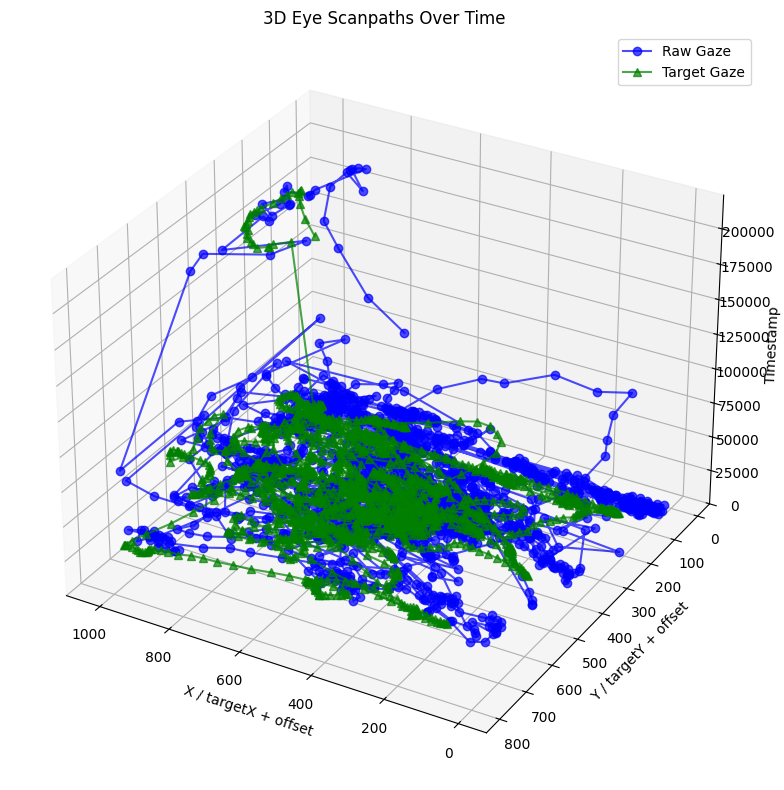

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load and sort the data
df = pd.read_csv(r'C:\Users\nisae\code\MPI\HCI\FINAL\gaze_data (4).csv')
df = df.sort_values(by='timestamp')

# Optional: offset target gaze to separate layers
offset = 50  # Adjust to visually separate scanpaths

# 3D Scanpath Plotting Function
def plot_3d_scanpaths(df, offset=50):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Raw gaze path
    ax.plot(df['x'], df['y'], df['timestamp'], color='blue', label='Raw Gaze', marker='o', alpha=0.7)

    # Target gaze path with offset
    ax.plot(df['targetX'] + offset, df['targetY'] + offset, df['timestamp'], 
            color='green', label='Target Gaze', marker='^', alpha=0.7)

    ax.set_xlabel("X / targetX + offset")
    ax.set_ylabel("Y / targetY + offset")
    ax.set_zlabel("Timestamp")
    ax.set_title("3D Eye Scanpaths Over Time")

    ax.view_init(elev=30, azim=120)  # Adjust angle for clarity
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_3d_scanpaths(df)


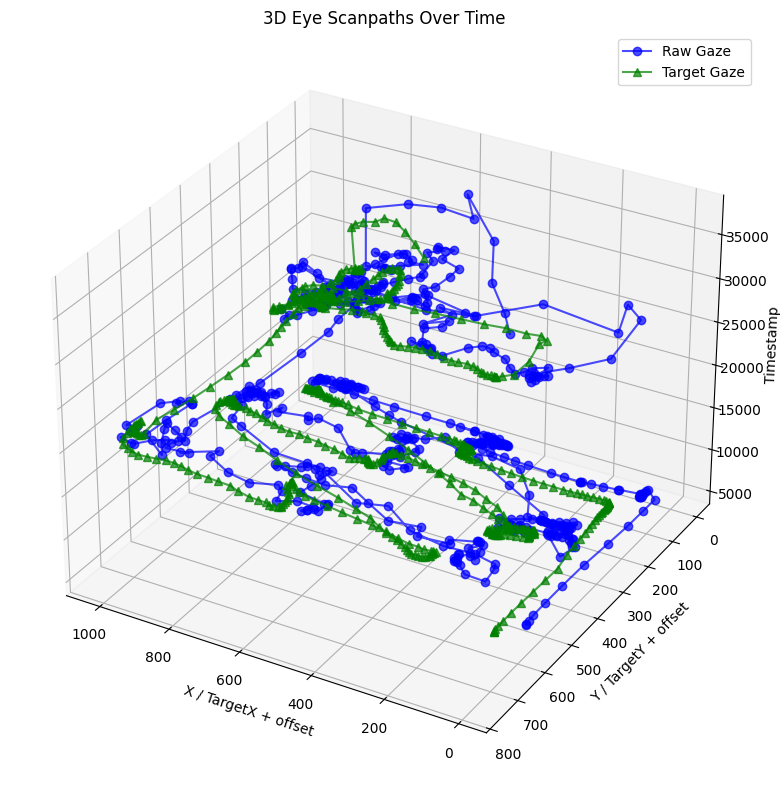

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load and sort the data
df = df.sort_values(by='timestamp')

# Optional: offset target gaze to separate layers
offset = 50  # Adjust to visually separate scanpaths

# 3D Scanpath Plotting Function
def plot_3d_scanpaths(df, offset=50):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Raw gaze path
    ax.plot(df['x'], df['y'], df['timestamp'], color='blue', label='Raw Gaze', marker='o', alpha=0.7)

    # Target gaze path with offset
    ax.plot(df['targetX'] + offset, df['targetY'] + offset, df['timestamp'], 
            color='green', label='Target Gaze', marker='^', alpha=0.7)

    ax.set_xlabel("X / TargetX + offset")
    ax.set_ylabel("Y / TargetY + offset")
    ax.set_zlabel("Timestamp")
    ax.set_title("3D Eye Scanpaths Over Time")

    ax.view_init(elev=30, azim=120)  # Adjust angle for clarity
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_3d_scanpaths(df)


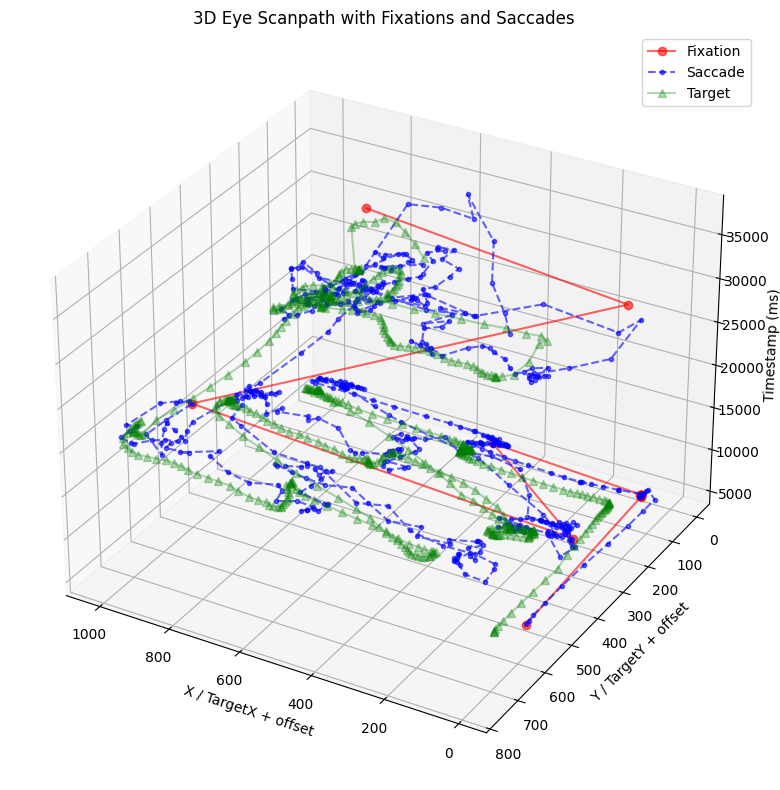

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load and sort data
df = df.sort_values(by='timestamp').reset_index(drop=True)

# --- Step 1: Compute Velocity ---
# Euclidean distance between consecutive points
dx = df['x'].diff()
dy = df['y'].diff()
dt = df['timestamp'].diff() / 1000.0  # Convert ms to seconds

# Avoid division by zero
dt[dt == 0] = 1e-5

velocity = np.sqrt(dx**2 + dy**2) / dt
df['velocity'] = velocity.fillna(0)

# --- Step 2: Label Movement Type ---
VELOCITY_THRESHOLD = 30  # pixels/second (adjust based on sampling rate & screen size)

df['movement_type'] = np.where(df['velocity'] < VELOCITY_THRESHOLD, 'fixation', 'saccade')

# --- Step 3: 3D Plot with Movement Type Coloring ---
def plot_3d_clustered_scanpaths(df, offset=50):
    fig = plt.figure(figsize=(14, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Fixations: slow movements (e.g., red)
    fixations = df[df['movement_type'] == 'fixation']
    ax.plot(fixations['x'], fixations['y'], fixations['timestamp'],
            color='red', marker='o', linestyle='-', label='Fixation', alpha=0.6)

    # Saccades: fast movements (e.g., blue)
    saccades = df[df['movement_type'] == 'saccade']
    ax.plot(saccades['x'], saccades['y'], saccades['timestamp'],
            color='blue', marker='.', linestyle='--', label='Saccade', alpha=0.6)

    # Optional: Target scanpath offset
    ax.plot(df['targetX'] + offset, df['targetY'] + offset, df['timestamp'],
            color='green', linestyle='-', marker='^', alpha=0.3, label='Target')

    ax.set_xlabel("X / TargetX + offset")
    ax.set_ylabel("Y / TargetY + offset")
    ax.set_zlabel("Timestamp (ms)")
    ax.set_title("3D Eye Scanpath with Fixations and Saccades")
    ax.legend()
    ax.view_init(elev=30, azim=120)
    plt.tight_layout()
    plt.show()

plot_3d_clustered_scanpaths(df)


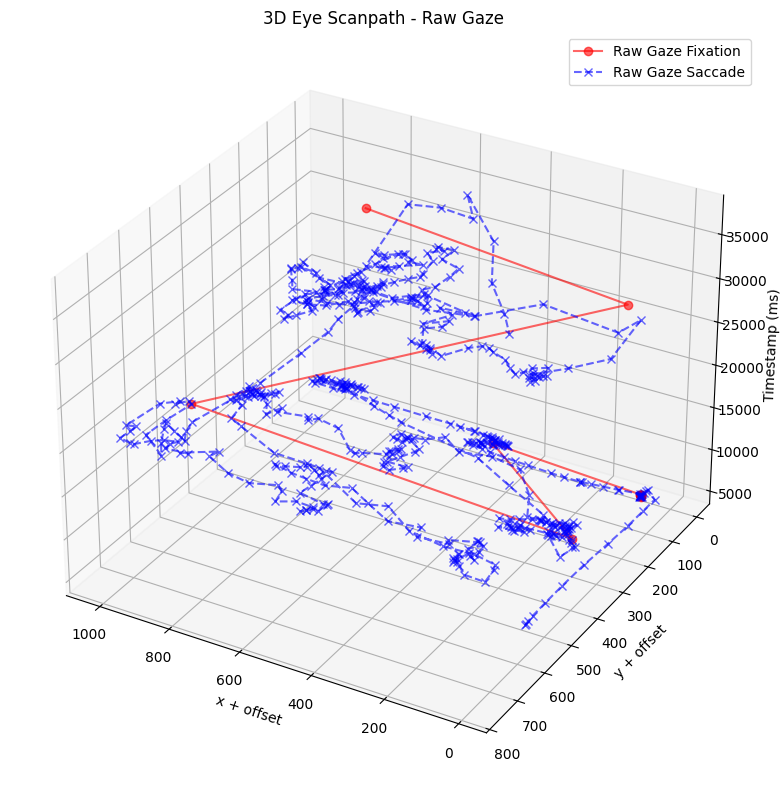

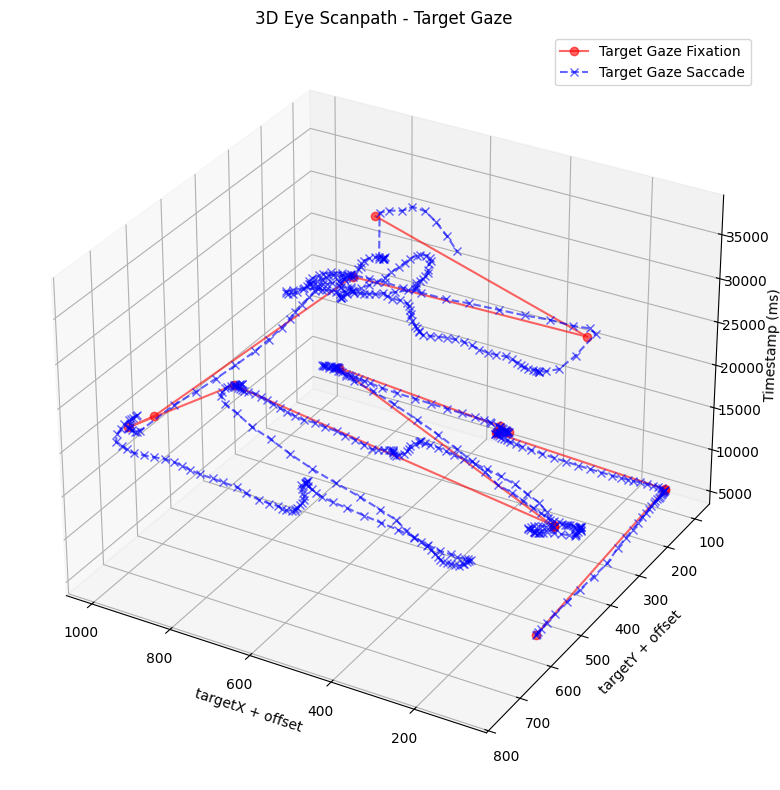

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Load and sort dataset ---
df = df.sort_values(by='timestamp').reset_index(drop=True)

# --- Velocity-based classification function ---
def classify_movements(x, y, timestamp, velocity_threshold=30):
    dx = x.diff()
    dy = y.diff()
    dt = timestamp.diff() / 1000.0  # Convert ms to seconds
    dt[dt == 0] = 1e-5

    velocity = np.sqrt(dx**2 + dy**2) / dt
    movement_type = np.where(velocity < velocity_threshold, 'fixation', 'saccade')
    return velocity.fillna(0), movement_type

# --- Raw gaze movement classification ---
df['velocity'], df['eye_mov_type'] = classify_movements(df['x'], df['y'], df['timestamp'])

# --- Target gaze movement classification ---
df['target_velocity'], df['target_eye_mov_type'] = classify_movements(df['targetX'], df['targetY'], df['timestamp'])

# --- 3D Plotting Function ---
def plot_3d_scanpath(df, x_col, y_col, mov_col, label_prefix="Gaze", offset=0, color_fix='red', color_sac='blue'):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Apply offset if needed
    x_vals = df[x_col] + offset
    y_vals = df[y_col] + offset

    fixations = df[df[mov_col] == 'fixation']
    saccades = df[df[mov_col] == 'saccade']

    # Fixations
    ax.plot(fixations[x_col] + offset, fixations[y_col] + offset, fixations['timestamp'],
            color=color_fix, marker='o', linestyle='-', label=f'{label_prefix} Fixation', alpha=0.6)

    # Saccades
    ax.plot(saccades[x_col] + offset, saccades[y_col] + offset, saccades['timestamp'],
            color=color_sac, marker='x', linestyle='--', label=f'{label_prefix} Saccade', alpha=0.6)

    ax.set_xlabel(f"{x_col} + offset")
    ax.set_ylabel(f"{y_col} + offset")
    ax.set_zlabel("Timestamp (ms)")
    ax.set_title(f"3D Eye Scanpath - {label_prefix}")
    ax.legend()
    ax.view_init(elev=30, azim=120)
    plt.tight_layout()
    plt.show()

# --- Plot Raw Gaze ---
plot_3d_scanpath(df, 'x', 'y', 'eye_mov_type', label_prefix="Raw Gaze")

# --- Plot Target Gaze (offset for separation) ---
plot_3d_scanpath(df, 'targetX', 'targetY', 'target_eye_mov_type', label_prefix="Target Gaze", offset=50)


In [ ]:
 Common Thresholds (empirical guidance):
20–50 px/sec – often used in psychological experiments.

30 px/sec – a reasonable default for 60–120Hz eye trackers.

Adjust if:

Too many false saccades → increase threshold.

Fixations look too short → decrease threshold.

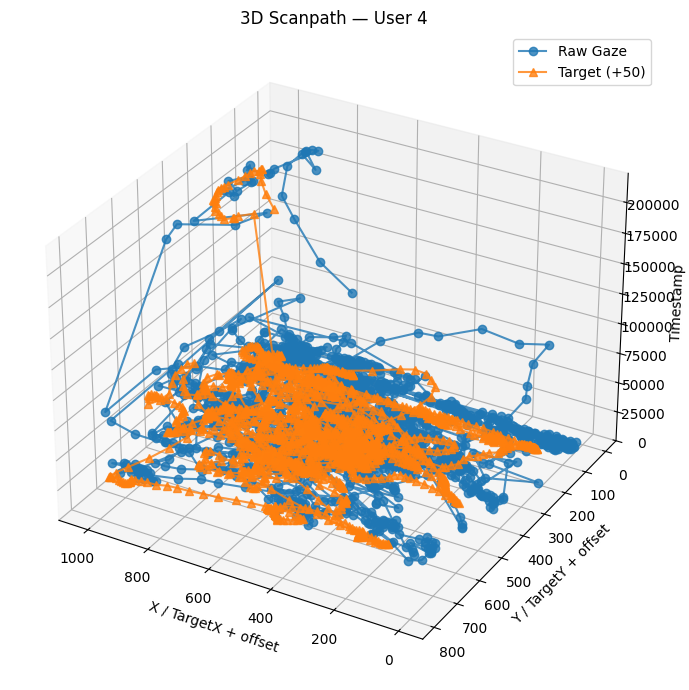

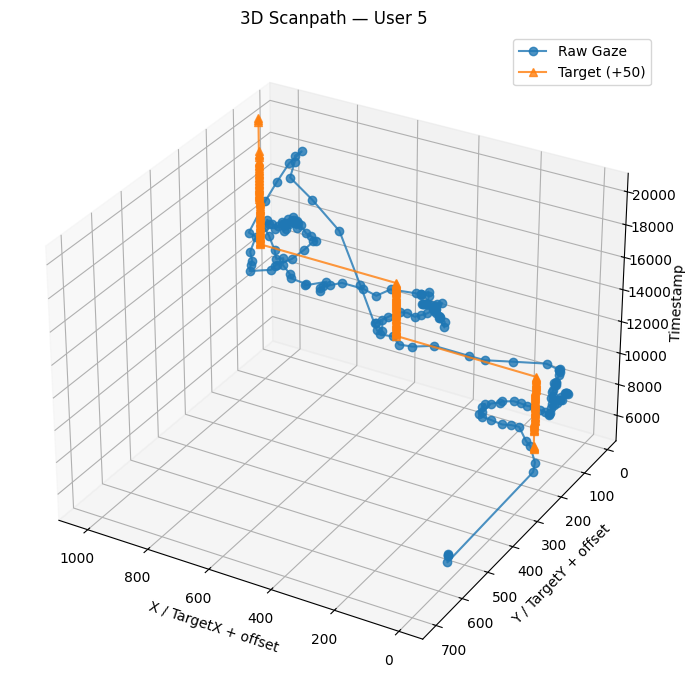

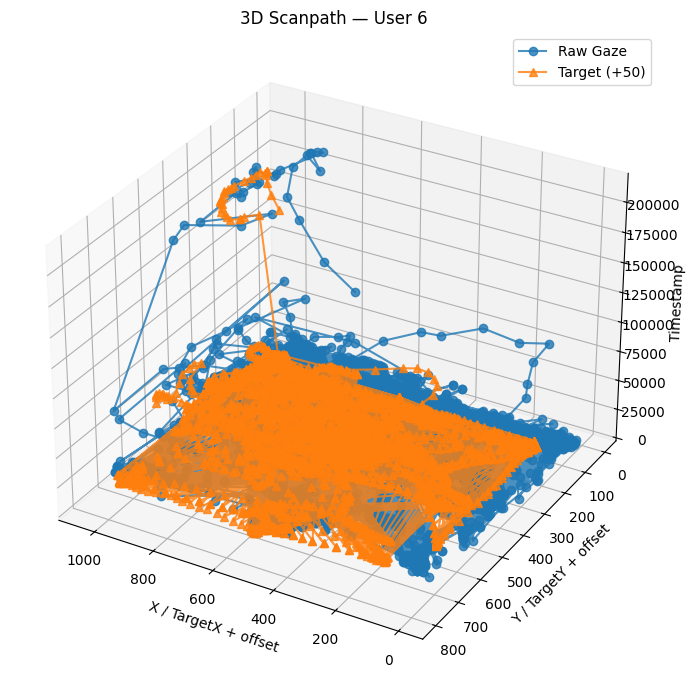

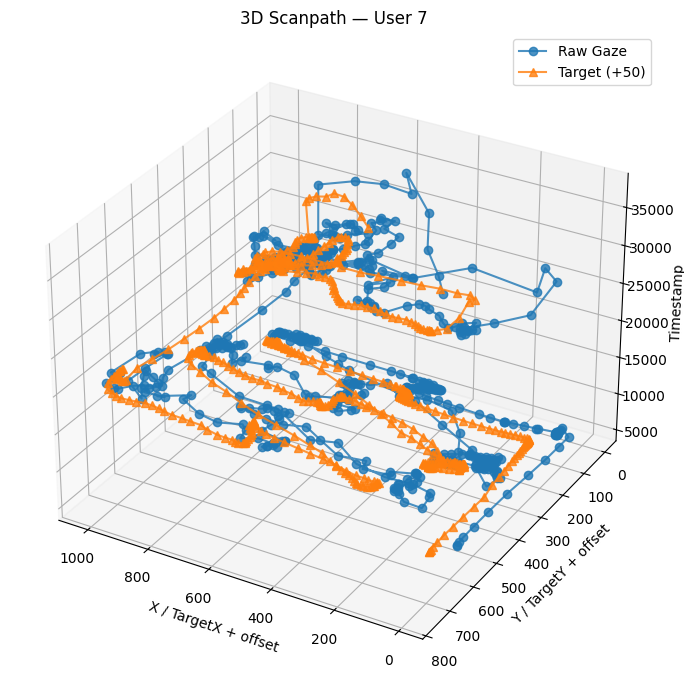

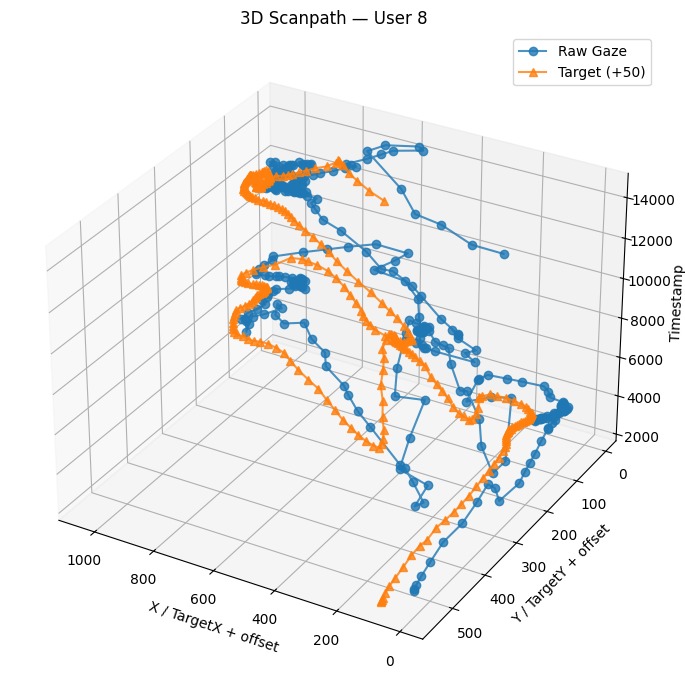

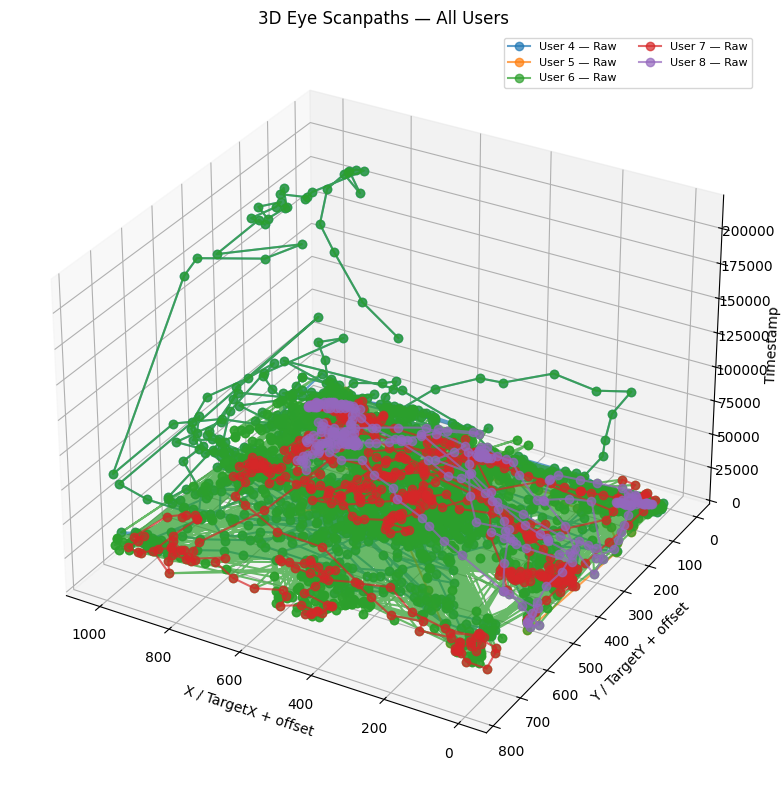

In [3]:
import glob, re, os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# ---------- Load & stack with a `user` column ----------
files = sorted(glob.glob("gaze_data*.csv"))
if not files:
    raise FileNotFoundError("No files matching 'gaze_data*.csv' found.")

def user_id_from_name(name, fallback):
    m = re.search(r"\((\d+)\)", name)  # uses the number in 'gaze_data (3).csv' if present
    return int(m.group(1)) if m else fallback

frames = []
for i, path in enumerate(files, start=1):
    df = pd.read_csv(path)
    df["user"] = user_id_from_name(os.path.basename(path), i)
    frames.append(df)

df = pd.concat(frames, ignore_index=True, sort=False)

# Keep expected columns only if they exist; coerce timestamp numeric and sort
expected = ["timestamp", "x", "y", "targetX", "targetY", "user"]
missing = [c for c in ["timestamp", "x", "y"] if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing} (need at least 'timestamp','x','y')")
df["timestamp"] = pd.to_numeric(df["timestamp"], errors="coerce")
df = df.dropna(subset=["timestamp"]).sort_values(["user", "timestamp"]).reset_index(drop=True)

# ---------- Plotting helpers ----------
def plot_3d_scanpaths_single(ax, data, title=None, offset=50, show_target=True, alpha=0.8):
    """Plot one scanpath (raw + optional target) onto a given 3D axes."""
    ax.plot(data["x"], data["y"], data["timestamp"], label="Raw Gaze", marker="o", alpha=alpha)
    if show_target and {"targetX","targetY"}.issubset(data.columns):
        ax.plot(data["targetX"] + offset, data["targetY"] + offset, data["timestamp"],
                label=f"Target (+{offset})", marker="^", alpha=alpha)
    ax.set_xlabel("X / TargetX + offset")
    ax.set_ylabel("Y / TargetY + offset")
    ax.set_zlabel("Timestamp")
    if title:
        ax.set_title(title)
    ax.view_init(elev=30, azim=120)

# ---------- 1) One figure per user ----------
def plot_per_user(df, offset=50, show_target=True, save_dir=None):
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
    for uid, g in df.groupby("user", sort=True):
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection="3d")
        plot_3d_scanpaths_single(ax, g, title=f"3D Scanpath — User {uid}", offset=offset, show_target=show_target)
        ax.legend()
        plt.tight_layout()
        if save_dir:
            out = os.path.join(save_dir, f"scanpath_user_{uid}.png")
            plt.savefig(out, dpi=150)
        plt.show()

# ---------- 2) One combined figure with all users ----------
def plot_all_users(df, offset=50, show_target=False):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection="3d")
    for uid, g in df.groupby("user", sort=True):
        # Let Matplotlib cycle colors automatically by user
        ax.plot(g["x"], g["y"], g["timestamp"], label=f"User {uid} — Raw", marker="o", alpha=0.7)
        if show_target and {"targetX","targetY"}.issubset(g.columns):
            ax.plot(g["targetX"] + offset, g["targetY"] + offset, g["timestamp"],
                    label=f"User {uid} — Target(+{offset})", marker="^", alpha=0.45)
    ax.set_xlabel("X / TargetX + offset")
    ax.set_ylabel("Y / TargetY + offset")
    ax.set_zlabel("Timestamp")
    ax.set_title("3D Eye Scanpaths — All Users")
    ax.view_init(elev=30, azim=120)
    ax.legend(ncols=2, fontsize=8)
    plt.tight_layout()
    plt.show()

# ---------- Run ----------
# Per-user plots (save files if you want)
plot_per_user(df, offset=50, show_target=True, save_dir=None)   # or e.g., save_dir="figs"

# Combined plot (toggle show_target if desired)
plot_all_users(df, offset=50, show_target=False)


In [ ]:
#STATISTICAL ANALYSIS

#Calculating eye movement types using I-VT classifier into Saccades and Fixations

import pandas as pd
import numpy as np

def ivt_classifier(data, px_per_deg, threshold_deg_s=30, min_duration_ms=100):
    """
    Apply I-VT classifier to raw eye-tracking data.
    
    Parameters:
    - data: DataFrame with columns ["timestamp", "x", "y"]
    - px_per_deg: float, pixels per degree of visual angle
    - threshold_deg_s: velocity threshold in deg/sec (typically 20–50)
    - min_duration_ms: minimum fixation duration in milliseconds

    Returns:
    - DataFrame with added 'type' column: 'fixation' or 'saccade'
    """
    data = df.sort_values('timestamp').reset_index(drop=True)
    
    # Compute velocity in px/sec
    dt = data['timestamp'].diff().fillna(1) / 1000.0  # avoid div by zero
    dx = data['x'].diff().fillna(0)
    dy = data['y'].diff().fillna(0)
    velocity_px_s = np.sqrt(dx**2 + dy**2) / dt

    # Convert to deg/sec
    velocity_deg_s = velocity_px_s / px_per_deg

    # Mark low-velocity samples as potential fixations
    is_fixation = velocity_deg_s < threshold_deg_s

    # Label sequences
    labels = []
    current_label = None
    start_time = None

    for i, fix in enumerate(is_fixation):
        t = data['timestamp'].iloc[i]
        if fix:
            if current_label != 'fixation':
                # Start of a potential fixation
                start_time = t
                current_label = 'fixation'
            labels.append('fixation')
        else:
            if current_label == 'fixation':
                duration = t - start_time
                if duration < min_duration_ms:
                    # Too short to be a fixation: re-label as saccade
                    labels[-(i - labels.count('saccade')):] = ['saccade'] * (i - labels.count('saccade'))
                current_label = 'saccade'
            labels.append('saccade')

    # Pad label list if needed
    if len(labels) < len(data):
        labels += ['saccade'] * (len(data) - len(labels))

    data['type'] = labels
    return data


In [21]:

# --- Your AOIs definition ---
AOIs = [
    { 'id': 'bookshelf',  'x':  44, 'y':  36, 'w': 249, 'h': 526 },
    { 'id': 'sofa_web',   'x': 350, 'y': 309, 'w': 127, 'h': 124 },
    { 'id': 'sofa_game',  'x': 543, 'y': 301, 'w': 123, 'h': 124 },
    { 'id': 'phone',      'x': 704, 'y': 284, 'w': 131, 'h': 125 },
    { 'id': 'lamp',       'x': 812, 'y':  87, 'w': 107, 'h': 134 },
    { 'id': 'tv',         'x': 842, 'y': 275, 'w': 171, 'h': 198 },
    { 'id': 'files',      'x': 500, 'y': 465, 'w': 101, 'h':  89 }
]

# --- Helper: check if a point is inside AOI ---
def point_in_aoi(x, y, aoi):
    return (
        aoi['x'] <= x <= aoi['x'] + aoi['w'] and
        aoi['y'] <= y <= aoi['y'] + aoi['h']
    )

# --- AOI Hit & Dwell Time Calculation ---
def calculate_aoi_hits(data, aois):
    results = []

    # Group by user
    for user_id, user_data in data.groupby('user'):
        user_data = user_data.reset_index(drop=True)

        # Track fixation blocks
        start_idx = None

        for i in range(len(user_data)):
            row = user_data.iloc[i]

            if row['type'] == 'fixation':
                if start_idx is None:
                    start_idx = i
            else:
                if start_idx is not None:
                    fix_data = user_data.iloc[start_idx:i]
                    duration = fix_data['timestamp'].iloc[-1] - fix_data['timestamp'].iloc[0]
                    x_mean = fix_data['x'].mean()
                    y_mean = fix_data['y'].mean()

                    for aoi in aois:
                        if point_in_aoi(x_mean, y_mean, aoi):
                            results.append({
                                'user': user_id,
                                'aoi_id': aoi['id'],
                                'fixation_duration_ms': duration
                            })

                    start_idx = None  # Reset for next fixation

    # Convert and aggregate
    df_results = pd.DataFrame(results)
    summary = df_results.groupby(['user', 'aoi_id']).agg(
        total_dwell_time_ms=('fixation_duration_ms', 'sum'),
        fixation_hits=('fixation_duration_ms', 'count')
    ).reset_index()

    return summary

# After running ivt_classifier
px_per_deg = 30
data = ivt_classifier(df, px_per_deg=px_per_deg)

# Calculate AOI stats
aoi_summary = calculate_aoi_hits(data, AOIs)

print(aoi_summary)

NameError: name 'ivt_classifier' is not defined

In [20]:
#add a line to aggregate the results by user by summing total dwell time for the whole session
aoi_summary_total = aoi_summary.groupby('user').agg(
    total_dwell_t_ms=('total_dwell_t_ms', 'sum'),
    total_hits=('fixation_hits', 'sum')
).reset_index()

#add a line to aggregate the results by AOI by summing total dwell time for each AOI per user
hit_sec_per_aoi = aoi_summary.groupby('aoi_id').agg(
    total_dwell_t_ms=('total_dwell_time_ms', 'sum'),
    total_hits=('fixation_hits', 'sum'))


NameError: name 'aoi_summary' is not defined

In [ ]:
#STATISTICAL ANALYSIS AND VISUALIZATION  

# === 1. Load Data ===
#df = pd.read_csv("combined.csv")
df = pd.read_csv("C:/Users/nisae/OneDrive/Masaüstü/Yeni klasör/Gazeninja/gaze_data (8).csv")
print("Loaded data with shape:", df.shape)

# === 2. Descriptive Statistics ===
print("\n=== Descriptive Statistics ===")
desc = df.groupby(['mode'])[['dt_sec_per_aoi', 'total_dwell_t_ms']].describe()
print(desc)

# === 3. Statistical Graphics ===
def plot_violin_box(dv):
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='InteractionCondition', y=dv, hue='InterfaceStyle', data=df, inner='box')
    plt.title(f'{dv} by Condition and Style')
    plt.tight_layout()
    plt.show()

for dv in ['SelectionTime', 'SUS_Score', 'TaskCompletionTime']:
    plot_violin_box(dv)

# === 4. Gaze Distribution Heatmap ===
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df['x'], y=df['y'], cmap="Reds", fill=True, thresh=0.05)
plt.title("Raw Gaze Distribution")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# === 5. AOI Hits, Dwell, and Transitions ===
AOIs = [
    { 'id': 'bookshelf',  'x':  44, 'y':  36, 'w': 249, 'h': 526 },
    { 'id': 'sofa_web',   'x': 350, 'y': 309, 'w': 127, 'h': 124 },
    { 'id': 'sofa_game',  'x': 543, 'y': 301, 'w': 123, 'h': 124 },
    { 'id': 'phone',      'x': 704, 'y': 284, 'w': 131, 'h': 125 },
    { 'id': 'lamp',       'x': 812, 'y':  87, 'w': 107, 'h': 134 },
    { 'id': 'tv',         'x': 842, 'y': 275, 'w': 171, 'h': 198 },
    { 'id': 'files',      'x': 500, 'y': 465, 'w': 101, 'h':  89 }
]

def point_in_aoi(x, y, aoi):
    return aoi['x'] <= x <= aoi['x'] + aoi['w'] and aoi['y'] <= y <= aoi['y'] + aoi['h']

def calculate_aoi_hits(data, aois):
    results = []
    for user_id, user_data in data.groupby('user'):
        user_data = user_data.reset_index(drop=True)
        start_idx = None
        previous_aoi = None
        transitions = []

        for i in range(len(user_data)):
            row = user_data.iloc[i]
            if row['type'] == 'fixation':
                if start_idx is None:
                    start_idx = i
            else:
                if start_idx is not None:
                    fix_data = user_data.iloc[start_idx:i]
                    duration = fix_data['timestamp'].iloc[-1] - fix_data['timestamp'].iloc[0]
                    x_mean = fix_data['x'].mean()
                    y_mean = fix_data['y'].mean()

                    for aoi in aois:
                        if point_in_aoi(x_mean, y_mean, aoi):
                            current_aoi = aoi['id']
                            results.append({'user': user_id, 'aoi_id': current_aoi, 'duration': duration})
                            if previous_aoi and previous_aoi != current_aoi:
                                transitions.append((previous_aoi, current_aoi))
                            previous_aoi = current_aoi
                    start_idx = None

    dwell_df = pd.DataFrame(results)
    dwell_summary = dwell_df.groupby(['user', 'aoi_id']).agg(
        dwell_time=('duration', 'sum'),
        hits=('duration', 'count')
    ).reset_index()

    transition_df = pd.DataFrame(transitions, columns=['from', 'to'])
    trans_counts = transition_df.groupby(['from', 'to']).size().reset_index(name='count')

    return dwell_summary, trans_counts

# Make sure 'type' column exists (i.e., run classifier)
if 'type' not in df.columns:
    print("Missing 'type' column. Run fixation classifier first.")
else:
    dwell_summary, trans_counts = calculate_aoi_hits(df, AOIs)
    print("\n=== Dwell Summary ===\n", dwell_summary.head())
    print("\n=== AOI Transitions ===\n", trans_counts.head())

# === 6. Attention Map (Fixation Heatmap) ===
fixations = df[df['type'] == 'fixation']
plt.figure(figsize=(8, 6))
sns.kdeplot(x=fixations['x'], y=fixations['y'], cmap="Blues", fill=True, thresh=0.05)
plt.title("Attention Map (Fixations)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# === 7. Scanpath Visualization ===
def plot_scanpath(user_id):
    user_data = df[(df['user'] == user_id) & (df['type'] == 'fixation')]
    plt.figure(figsize=(8, 6))
    plt.plot(user_data['x'], user_data['y'], marker='o', linestyle='-')
    for i, row in user_data.iterrows():
        plt.text(row['x'], row['y'], f"{int(row['timestamp'])}", fontsize=8)
    plt.gca().invert_yaxis()
    plt.title(f'Scanpath - User {user_id}')
    plt.tight_layout()
    plt.show()

sample_user = df['user'].unique()[0]
plot_scanpath(sample_user)

# === 8. Mixed ANOVA ===
df['user'] = df['user'].astype(str)
df['InterfaceStyle'] = df['InterfaceStyle'].astype('category')
df['InteractionCondition'] = df['InteractionCondition'].astype('category')

def run_mixed_anova(dv):
    print(f"\n==== Mixed ANOVA: {dv} ====")
    aov = pg.mixed_anova(dv=dv,
                         within='InteractionCondition',
                         between='InterfaceStyle',
                         subject='user',
                         data=df,
                         correction=True,
                         effsize='np2')
    print(aov)
    return aov

for dv in ['SelectionTime', 'SUS_Score', 'TaskCompletionTime']:
    run_mixed_anova(dv)


Loaded data with shape: (1742, 6)

=== Descriptive Statistics ===


KeyError: 'InterfaceStyle'

In [33]:
pip install pingouin


  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.7 MB 6.3 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.7 MB 6.5 MB/s eta 0:00:01
   ------------------------ --------------- 5.2/8.7 MB 8.8 MB/s eta 0:00:01
   ------------------------------------- -- 8.1/8.7 MB 9.9 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 9.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------- ----------------------------- 2.6/9.6 MB 13.2 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.6 MB 13.2 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.6 MB 13.1 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 12.0 MB/s eta 0:00:00
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
   ---------------------------------------- 0.0/1.3 M


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#nope not really

import pandas as pd
import pingouin as pg

# === Load and inspect data ===
df = pd.read_csv("C:/Users/nisae/OneDrive/Masaüstü/Yeni klasör/Gazeninja/gaze_data (8).csv")
print("Columns:", df.columns.tolist())
print("Preview:\n", df.head())
print("NA counts:\n", df.isna().sum())

# === Sanity check: unique values in IVs ===
print("\nUnique Interface Styles:", df['InterfaceStyle'].unique())
print("Unique Conditions:", df['InteractionCondition'].unique())

# === Convert necessary columns to category ===
df['user'] = df['user'].astype(str)  # Ensure 'user' is treated as identifier
df['InterfaceStyle'] = df['InterfaceStyle'].astype('category')
df['InteractionCondition'] = df['InteractionCondition'].astype('category')

# === Mixed ANOVA function for each DV ===
def run_mixed_anova(dv):
    print(f"\n==== Running Mixed ANOVA for {dv} ====")
    aov = pg.mixed_anova(dv=dv,
                         within='InteractionCondition',
                         between='InterfaceStyle',
                         subject='user',
                         data=df,
                         correction=True,
                         effsize='np2')  # partial eta squared
    print(aov)
    return aov

# === Run for all dependent variables ===
results = {
    'SelectionTime': run_mixed_anova('SelectionTime'),
    'SUS_Score': run_mixed_anova('SUS_Score'),
    'TaskCompletionTime': run_mixed_anova('TaskCompletionTime')
}

# === Post-hocs if needed ===
# Example: post-hoc for InterfaceStyle if main effect is significant
posthoc_interface = pg.pairwise_tests(dv='SelectionTime',
                                      between='InterfaceStyle',
                                      parametric=True,
                                      padjust='bonf',
                                      data=df)
print("\nPost-hoc (Interface Style):\n", posthoc_interface)


Columns: ['x', 'y', 'timestamp', 'targetX', 'targetY', 'mode']
Preview:
       x     y  timestamp  targetX  targetY mode
0   0.0  55.0     3897.6     0.00    55.00   ge
1   9.0  72.0     3950.5     1.35    57.55   ge
2   2.0  47.0     4032.0     1.45    55.97   ge
3  27.0  61.0     4064.7     5.28    56.72   ge
4  39.0  56.0     4098.4    10.34    56.61   ge
NA counts:
 x            0
y            0
timestamp    0
targetX      0
targetY      0
mode         0
dtype: int64


KeyError: 'InterfaceStyle'

In [ ]:

# === Load and inspect data ===
df = pd.read_csv("combined.csv")
print("Columns:", df.columns.tolist())
print("Preview:\n", df.head())
print("NA counts:\n", df.isna().sum())

# === Sanity check: unique values in IVs ===
print("\nUnique Interface Styles:", df['InterfaceStyle'].unique())
print("Unique Conditions:", df['InteractionCondition'].unique())

# === Convert necessary columns to category ===
df['user'] = df['user'].astype(str)  # Ensure 'user' is treated as identifier
df['InterfaceStyle'] = df['InterfaceStyle'].astype('category')
df['InteractionCondition'] = df['InteractionCondition'].astype('category')

# === Mixed ANOVA function for each DV ===
def run_mixed_anova(dv):
    print(f"\n==== Running Mixed ANOVA for {dv} ====")
    aov = pg.mixed_anova(dv=dv,
                         within='InteractionCondition',
                         between='InterfaceStyle',
                         subject='user',
                         data=df,
                         correction=True,
                         effsize='np2')  # partial eta squared
    print(aov)
    return aov

# === Run for all dependent variables ===
results = {
    'SelectionTime': run_mixed_anova('SelectionTime'),
    'SUS_Score': run_mixed_anova('SUS_Score'),
    'TaskCompletionTime': run_mixed_anova('TaskCompletionTime')
}

# === Post-hocs if needed ===
# Example: post-hoc for InterfaceStyle if main effect is significant
posthoc_interface = pg.pairwise_tests(dv='SelectionTime',
                                      between='InterfaceStyle',
                                      parametric=True,
                                      padjust='bonf',
                                      data=df)
print("\nPost-hoc (Interface Style):\n", posthoc_interface)


ModuleNotFoundError: No module named 'pingouin'